In [394]:
import numpy as np
import csv
import json
import matplotlib.pyplot as plt; plt.rcdefaults()

import pandas as pd
from pandas import DataFrame


In [317]:
df = pd.read_csv('data.csv')
df = df.drop('URL', axis=1)
df['Artist_and_Track_Name'] = df['Artist']+ ' - ' + df['Track Name']
df.head()

,Position,Track Name,Artist,Streams,Date,Region,Artist_and_Track_Name
0,1,Reggaetón Lento (Bailemos),CNCO,19272,1/1/2017,ec,CNCO - Reggaetón Lento (Bailemos)
1,2,Chantaje,Shakira,19270,1/1/2017,ec,Shakira - Chantaje
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,1/1/2017,ec,Zion & Lennox - Otra Vez (feat. J Balvin)
3,4,Vente Pa' Ca,Ricky Martin,14954,1/1/2017,ec,Ricky Martin - Vente Pa' Ca
4,5,Safari,J Balvin,14269,1/1/2017,ec,J Balvin - Safari


In [318]:
US_only_df = df[df['Region'] == 'us']
US_only_df.head()

,Position,Track Name,Artist,Streams,Date,Region,Artist_and_Track_Name
771622,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,1371493,1/1/2017,us,Migos - Bad and Boujee (feat. Lil Uzi Vert)
771623,2,Fake Love,Drake,1180074,1/1/2017,us,Drake - Fake Love
771624,3,Starboy,The Weeknd,1064351,1/1/2017,us,The Weeknd - Starboy
771625,4,Closer,The Chainsmokers,1010492,1/1/2017,us,The Chainsmokers - Closer
771626,5,Black Beatles,Rae Sremmurd,874289,1/1/2017,us,Rae Sremmurd - Black Beatles


In [397]:
# groupby artist and track then stream count
US = US_only_df.groupby(['Artist_and_Track_Name'])['Streams'].sum().reset_index()
US_df = pd.DataFrame(US)
# sort descending order on stream count
US = US_df.sort_values(['Streams'], ascending=False)
US.rename(columns = {'Streams':'US_Streams'}, inplace = True)
# create column "position"
US['Position'] = range(1, 1+len(US))
# create index to value to find top 10, and delete the rest
indexNames = US[ (US['Position'] >= 11) ].index
US.drop(indexNames , inplace=True)
# copy data
US.copy()
print(US.US_Streams.values.tolist())
print(US.Position.values.tolist())
print(US.Artist_and_Track_Name.values.tolist())

# export_csv = US.to_csv('usa.streams.csv')

[339677217, 316206696, 285451131, 282319891, 241828211, 238013267, 235012075, 227087919, 226224851, 221788327]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
['Kendrick Lamar - HUMBLE.', 'Lil Uzi Vert - XO TOUR Llif3', 'Post Malone - Congratulations', 'Ed Sheeran - Shape of You', 'Future - Mask Off', 'Post Malone - rockstar', 'Luis Fonsi - Despacito - Remix', 'KYLE - iSpy (feat. Lil Yachty)', 'Khalid - Location', 'Logic - 1-800-273-8255']


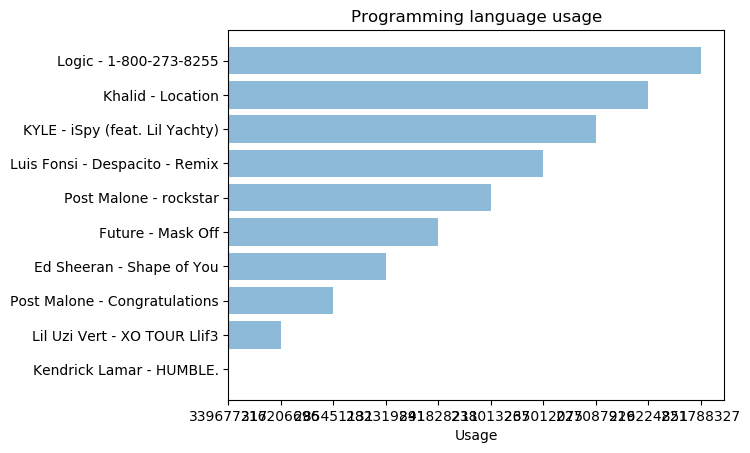

In [400]:
objects = ('Kendrick Lamar - HUMBLE.', 'Lil Uzi Vert - XO TOUR Llif3', 'Post Malone - Congratulations', 
           'Ed Sheeran - Shape of You', 'Future - Mask Off', 'Post Malone - rockstar', 
           'Luis Fonsi - Despacito - Remix', 'KYLE - iSpy (feat. Lil Yachty)', 
           'Khalid - Location', 'Logic - 1-800-273-8255')
y_pos = np.arange(len(objects))
performance = ['339677217', '316206696', '285451131', '282319891', '241828211',
               '238013267', '235012075', '227087919', '226224851', '221788327']

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Usage')
plt.title('Programming language usage')

plt.show()

In [335]:
DE_only_df = df[df['Region'] == 'de']
DE_only_df.head()


,Position,Track Name,Artist,Streams,Date,Region,Artist_and_Track_Name
958915,1,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,229398,1/1/2017,de,Clean Bandit - Rockabye (feat. Sean Paul & Ann...
958916,2,Alone,Alan Walker,192026,1/1/2017,de,Alan Walker - Alone
958917,3,Chöre,Mark Forster,181869,1/1/2017,de,Mark Forster - Chöre
958918,4,Starboy,The Weeknd,176328,1/1/2017,de,The Weeknd - Starboy
958919,5,Closer,The Chainsmokers,170745,1/1/2017,de,The Chainsmokers - Closer


In [344]:
# groupby artist and track then stream count
DE = DE_only_df.groupby(['Artist_and_Track_Name'])['Streams'].sum().reset_index()
DE_df = pd.DataFrame(DE)
# sort descending order on stream count
DE = DE_df.sort_values(['Streams'], ascending=False)
DE.rename(columns = {'Streams':'Germany_Streams'}, inplace = True)
# # create column "position"
DE['Position'] = range(1, 1+len(DE))
# # create index to value to find top 10, and delete the rest
indexNames = DE[ (DE['Position'] >= 11) ].index
DE.drop(indexNames , inplace=True)
# copy data
DE.copy
export_csv = DE.to_csv('germany.streams.csv')

In [336]:
FR_only_df = df[df['Region'] == 'fr']
FR_only_df.head()

,Position,Track Name,Artist,Streams,Date,Region,Artist_and_Track_Name
74200,1,One Dance,Drake,89403,1/1/2017,fr,Drake - One Dance
74201,2,Starboy,The Weeknd,80882,1/1/2017,fr,The Weeknd - Starboy
74202,3,24K Magic,Bruno Mars,80838,1/1/2017,fr,Bruno Mars - 24K Magic
74203,4,My Way,Calvin Harris,72133,1/1/2017,fr,Calvin Harris - My Way
74204,5,Mauvaise graine,Nekfeu,71082,1/1/2017,fr,Nekfeu - Mauvaise graine


In [343]:
# groupby artist and track then stream count
FR = FR_only_df.groupby(['Artist_and_Track_Name'])['Streams'].sum().reset_index()
FR_df = pd.DataFrame(FR)
# sort descending order on stream count
FR = FR_df.sort_values(['Streams'], ascending=False)
FR.rename(columns = {'Streams':'France_Streams'}, inplace = True)
# # create column "position"
FR['Position'] = range(1, 1+len(FR))
# # create index to value to find top 10, and delete the rest
indexNames = FR[ (FR['Position'] >= 11) ].index
FR.drop(indexNames , inplace=True)
# copy data
FR.copy
export_csv = FR.to_csv('france.streams.csv')

In [341]:
LT_only_df = df[df['Region'] == 'lt']
LT_only_df.head()

,Position,Track Name,Artist,Streams,Date,Region,Artist_and_Track_Name
445200,1,Starboy,The Weeknd,2583,1/1/2017,lt,The Weeknd - Starboy
445201,2,I Feel It Coming,The Weeknd,2257,1/1/2017,lt,The Weeknd - I Feel It Coming
445202,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,1972,1/1/2017,lt,ZAYN - I Don’t Wanna Live Forever (Fifty Shade...
445203,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,1961,1/1/2017,lt,Clean Bandit - Rockabye (feat. Sean Paul & Ann...
445204,5,Closer,The Chainsmokers,1944,1/1/2017,lt,The Chainsmokers - Closer


In [342]:
# groupby artist and track then stream count
LT = LT_only_df.groupby(['Artist_and_Track_Name'])['Streams'].sum().reset_index()
LT_df = pd.DataFrame(LT)
# sort descending order on stream count
LT = LT_df.sort_values(['Streams'], ascending=False)
LT.rename(columns = {'Streams':'Lithuania_Streams'}, inplace = True)
# # create column "position"
LT['Position'] = range(1, 1+len(LT))
# # create index to value to find top 10, and delete the rest
indexNames = LT[ (LT['Position'] >= 11) ].index
LT.drop(indexNames , inplace=True)
# copy data
LT.copy
export_csv = LT.to_csv('lithuania.streams.csv')

In [346]:
NO_only_df = df[df['Region'] == 'no']
NO_only_df.head()

,Position,Track Name,Artist,Streams,Date,Region,Artist_and_Track_Name
296800,1,Alone,Alan Walker,103886,1/1/2017,no,Alan Walker - Alone
296801,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,1/1/2017,no,Clean Bandit - Rockabye (feat. Sean Paul & Ann...
296802,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,1/1/2017,no,ZAYN - I Don’t Wanna Live Forever (Fifty Shade...
296803,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,1/1/2017,no,Starley - Call On Me - Ryan Riback Extended Remix
296804,5,I Feel It Coming,The Weeknd,56607,1/1/2017,no,The Weeknd - I Feel It Coming


In [348]:
# groupby artist and track then stream count
NO = NO_only_df.groupby(['Artist_and_Track_Name'])['Streams'].sum().reset_index()
NO_df = pd.DataFrame(NO)
# sort descending order on stream count
NO = NO_df.sort_values(['Streams'], ascending=False)
NO.rename(columns = {'Streams':'Norway_Streams'}, inplace = True)
# # create column "position"
NO['Position'] = range(1, 1+len(NO))
# # create index to value to find top 10, and delete the rest
indexNames = NO[ (NO['Position'] >= 11) ].index
NO.drop(indexNames , inplace=True)
# copy data
NO.copy
export_csv = NO.to_csv('norway.streams.csv')